# Models

This Notebook is divided into three parts. 
* Part A: Feature selection to run the models accordingly to Logistic Regression assumptions.Then, we will run our first Models.
* Part B: We will add the 'actionable' features that were not adequate in Part A, and which we consider important.
* Part C: Do Train/ Test and MAPE metrcis to compare the models. Perform some outliers detection to improve performance.

In [1]:
# Scientific libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# model libraries 
from scipy.stats import chi2_contingency, norm
from scipy.stats import chi2_contingency, ttest_ind
import researchpy as rp
import scipy.stats as stats
# Model runners
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence

# Metrics options
from sklearn.metrics import roc_curve, auc

# Plotlib options
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
# Pandas options
pd.options.display.max_columns = None

In [2]:
# Dictionary with the purpose of reducing memory size when loading the dataset.
dict_tipos = {
# SIMAT
'ANO_INF':              'uint16',
'CODIGO_DANE':          'uint64',
'CODIGO_DANE_SEDE':     'uint64',
'TIPO_DOCUMENTO':       'uint8',
'NRO_DOCUMENTO':        'string',
'DIRECCION_RESIDENCIA': 'string',
'RES_DEPTO':            'uint8',
'RES_MUN':              'uint16',
'ESTRATO':              'uint8',
'SISBEN':               'float16',
'GENERO':               'uint8',
'POB_VICT_CONF':        'uint8',
'PROVIENE_SECTOR_PRIV': 'uint8',
'PROVIENE_OTR_MUN':     'uint8',
'TIPO_DISCAPACIDAD':    'uint8',
'CAP_EXC':              'uint8',
'CODIGO_ETNIA':         'uint16',
'CODIGO_JORNADA':       'uint8',
'CARACTER':             'uint8',
'CODIGO_ESPECIALIDAD':  'uint8',
'CODIGO_GRADO':         'int8',
'CODIGO_METODOLOGIA':   'uint8',
'REPITENTE':            'uint8',
'SIT_ACAD_ANIO_ANT':    'uint8',
'CON_ALUM_ANIO_ANT':    'uint8',
'ZONA_RESI_ALU':        'uint8',
'EDAD':                 'uint8',
'NIVEL':                'uint8',
'DIR_NUM_LOCALIDAD':    'uint8',
'NIVEL_SISBEN':         'uint8',
'GRADO_OVERAGE':        'uint8',
'OVERAGE':              'uint8',
# SISBEN
'ficha':                'int64',
'comuna':               'uint8',
'barrio':               'uint32',
'nombarrio':            'string',
'direcc':               'string',
'vereda':               'uint8',
'nomvereda':            'string',
'vivienda':             'uint8',
'pared':                'uint8',
'piso':                 'uint8',
'energia':              'uint8',
'alcanta':              'uint8',
'gas':                  'uint8',
'telefono' :            'uint8',
'basura' :              'uint8',
'acueduc' :             'uint8',
'estrato' :             'uint8',
'elimbasura' :          'uint8',
'tcuartosvi' :          'uint8',
'thogar' :              'uint8',
'recolec' :             'uint8',
'tipdir' :              'uint8',
'verifica' :            'uint8',
'hogar' :               'uint8',
'teneviv' :             'uint8',
'tcuartos' :            'uint8',
'tdormir' :             'uint8',
'sanitar' :             'uint8',
'usanitar' :            'uint8',
'usosani' :             'uint8',
'tsanitar' :            'uint8',
'ducha' :               'uint8',
'agua' :                'uint8',
'llega' :               'uint8',
'cuandi' :              'uint8',
'suminis' :             'uint8',
'cuanhoras' :           'uint8',
'preparan' :            'uint8',
'cocina' :              'uint8',
'cocinan' :             'uint8',
'alumbra' :             'uint8',
'usotele' :             'uint8',
'nevera' :              'uint8',
'lavadora' :            'uint8',
'tvcolor' :             'uint8',
'tvcable' :             'uint8',
'calenta' :             'uint8',
'horno' :               'uint8',
'aire' :                'uint8',
'computador' :          'uint8',
'equipo' :              'uint8',
'moto' :                'uint8',
'tractor' :             'uint8',
'tiene_auto' :          'uint8',
'bieraices':            'uint8',
'tpersona' :            'uint8',
'informan' :            'uint8',
'orden' :               'uint8',
'nucleo' :              'uint8',
'parentes' :            'uint8',
'tipodoc' :             'uint8',
'documen':              'string',
'sexo' :                'uint8',
'estcivil' :            'uint8',
'discapa' :             'uint8',
'carnet' :              'uint8',
'asiste' :              'uint8',
'tipoesta' :            'uint8',
'grado' :               'uint8',
'nivel' :               'uint8',
'activi' :              'uint8',
'buscando' :            'uint8',
'ingresos':             'int64',
'edad':                 'uint8',
'conyuvive':            'uint8',
'hijosde':              'int8',
'embaraza' :            'uint8',
'extranjero' :          'uint8',
'pagapor' :             'uint8',
'percibe' :             'uint8',
'serdomes' :            'uint8',
'unigasto' :            'uint8',
'area' :                'uint8',
'nparentes':            'uint8',
'puntaje_sisben_3':     'float32',
'todos_servicios_Pub':  'uint8',
'indice_hacinamiento':  'float16',
# C-600  
'ES_BILIGUE':           'int8',
'TOTAL_DOCENTES':       'uint16',
'TOTAL_ALUMNOS':        'uint16',
'TOTAL_EQUIPO_COMPUTO': 'uint16',
'TOTAL_DOCENTES_CON_TITULO':'uint8',
# ICFES
'num_presentaron_ICFES': 'uint8'
  }




In [26]:
df = pd.read_csv('data/3-oro/Merge_2020_ICFES_C600.csv' , index_col=0, dtype = dict_tipos)

In [27]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457047 entries, 0 to 457046
Columns: 130 entries, ANO_INF to num_presentaron_ICFES
dtypes: float16(2), float32(1), float64(4), int64(3), int8(2), object(2), string(5), uint16(6), uint32(1), uint64(2), uint8(102)
memory usage: 115.1+ MB


In [28]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2020,111001000078,111001000078,2,1000004716,CL 29 A SUR # 50 - 41 PL 2,11,1,3,29.0,2003-04-14,0,99,0,0,0,9,0,6,1,5,10,1,0,1,9,1,16,4,16,1,100,0,4304159,16,4407,ALCALA,CL 33 SUR 51 A 47 PI 1 CU 1,0,BARRIO ZONA URBANA,2,1,2,1,1,1,2,1,1,3,1,2,1,3,1,1,1,1,2,2,1,1,2,1,1,1,1,0,1,0,1,2,2,1,0,1,1,1,2,2,2,2,0,2,0,0,0,1,5,2,4,1,3,2,0,5,0,0,1,4,3,1,3,0,0,8,0,0,0,0,0,0,0,1,1,3,29.440001,Hacinamiento_medio,1,2.5,0,27,627,231,23.222222,0.368421,24,0.888889,262.909091,33


In [29]:
df_reducido = df[variables + categorias]

In [30]:
df_reducido['REPITENTE'] = df['REPITENTE']

<ipython-input-30-23eb72ec85fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reducido['REPITENTE'] = df['REPITENTE']


In [31]:
df_reducido

,EDAD,GRADO_OVERAGE,estrato,puntaje_sisben_3,indice_hacinamiento,ingresos,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_GRADO,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,DIR_NUM_LOCALIDAD,vivienda,embaraza,nparentes,todos_servicios_Pub,teneviv,computador,tiene_auto,ES_BILINGUE,REPITENTE
0,16,100,3,29.440001,2.500000,0,231,23.222222,0.368421,24,0.888889,262.909091,33,0,99,0,0,0,9,0,6,1,10,1,9,1,16,2,0,3,1,1,0,0,0,0
1,16,100,2,60.119999,1.333008,0,231,23.222222,0.368421,24,0.888889,262.909091,33,0,99,0,0,0,9,0,6,1,11,1,9,1,16,1,0,4,1,1,0,0,0,0
2,16,100,3,37.090000,1.666992,0,231,23.222222,0.368421,24,0.888889,262.909091,33,0,99,0,0,0,9,0,6,1,11,1,9,1,16,1,0,3,1,1,0,0,0,0
3,16,100,3,41.570000,3.000000,0,231,23.222222,0.368421,24,0.888889,262.909091,33,1,99,0,0,0,9,0,6,1,11,1,9,1,16,1,0,3,0,1,0,0,0,0
4,16,100,3,16.549999,6.000000,0,231,23.222222,0.368421,24,0.888889,262.909091,33,1,99,0,0,0,9,0,6,1,11,1,9,1,16,2,0,3,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457042,14,100,1,65.589996,3.000000,21000,84,24.052632,0.183807,7,0.368421,310.571429,21,1,99,0,0,0,9,0,6,0,9,1,9,1,19,1,0,3,1,3,1,0,0,0
457043,14,100,1,53.740002,1.500000,0,84,24.052632,0.183807,7,0.368421,310.571429,21,1,99,0,0,0,9,0,6,0,9,1,9,1,19,1,0,3,1,2,0,0,0,0
457044,14,100,1,30.570000,2.500000,50000,84,24.052632,0.183807,7,0.368421,310.571429,21,0,99,0,0,0,9,0,6,0,9,1,9,1,19,1,0,3,1,1,1,0,0,0
457045,14,100,1,50.430000,2.666016,100000,84,24.052632,0.183807,7,0.368421,310.571429,21,1,99,0,0,0,9,0,6,0,9,1,9,1,19,1,0,4,1,3,1,0,0,0


In [32]:
df_reducido.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457047 entries, 0 to 457046
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   EDAD                       457047 non-null  uint8  
 1   GRADO_OVERAGE              457047 non-null  uint8  
 2   estrato                    457047 non-null  uint8  
 3   puntaje_sisben_3           457047 non-null  float32
 4   indice_hacinamiento        457047 non-null  float16
 5   ingresos                   457047 non-null  int64  
 6   TOTAL_EQUIPO_COMPUTO       457047 non-null  uint16 
 7   ALUMN_POR_DOCENTE          457047 non-null  float64
 8   COMPU_POR_ALUMN            457047 non-null  float64
 9   TOTAL_DOCENTES_CON_TITULO  457047 non-null  uint8  
 10  PROP_DOCENTES_CON_TITULO   457047 non-null  float64
 11  promepuntaje               457047 non-null  float64
 12  num_presentaron_ICFES      457047 non-null  uint8  
 13  GENERO                     45

In [33]:
df_reducido.to_csv('data/3-oro/DASH_Merge_2020_ICFES_C600.csv')

## Initial Variables

In [6]:
variables = ['EDAD',
             'GRADO_OVERAGE', #-> solo si no se incluye OVERAGE en Categoricas
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categorias
             'ingresos',
             #'TOTAL_DOCENTES',
             #'TOTAL_ALUMNOS',
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
             'num_presentaron_ICFES'
            ]


categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_SECTOR_PRIV',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CAP_EXC',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'CARACTER',
             # 'NIVEL', #-> Se esta filtrando por Nivel
             'CODIGO_GRADO',
             # 'CODIGO_METODOLOGIA', #No se inclye porque se filtra por este valor
            'SIT_ACAD_ANIO_ANT',
             'CON_ALUM_ANIO_ANT',
             'ZONA_RESI_ALU',
             'DIR_NUM_LOCALIDAD',
             #'OVERAGE', # si no se incluye GRADO_OVERAGE
             'vivienda',
             'embaraza',
             'nparentes',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE',
             #'nivel_hacinamiento',
             #'OVERAGE',

             ]

# Part A: Feature Selection

## Filter by grade Level and Methodology

In [7]:
df['NIVEL'].value_counts()/df['NIVEL'].shape[0]

2    0.403860
3    0.398370
4    0.142274
1    0.055495
Name: NIVEL, dtype: float64

In [8]:
df = df[(df['NIVEL']== 2)]

In [9]:
df['CODIGO_METODOLOGIA'].value_counts()/df['CODIGO_METODOLOGIA'].shape[0]

1    0.970263
9    0.029737
Name: CODIGO_METODOLOGIA, dtype: float64

In [10]:
df = df[(df['CODIGO_METODOLOGIA']==1)]

-----------

# Univariate Feature Selection for categorical data
## Pearson Chi-Squared Test For independence
### Part I: Features with dependence against REPITENTE

$$ H_{0} : The \: variables \: are \: Dependent$$
$$ H_{a}: The \: variables \:are \: not \: Dependent $$

#### References:
1. [Why Chi Test?](https://towardsdatascience.com/mistakes-in-applying-univariate-feature-selection-methods-34c43ce8b93d)
2. [Why we implemented it in this way?](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

In [11]:
chi2_values_df = pd.DataFrame(columns = ['Category', 'p-value'])
cat_dep = []
p_values = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p <= 0.05:
        cat_dep.append(i)
        p_values.append(p)
print('Dependent variables that reject H0 at a significance level of 5%')
chi2_values_df['Category'] = cat_dep
chi2_values_df['p-value'] = p_values
print(chi2_values_df.sort_values(by = 'p-value'))
    

Dependent variables that reject H0 at a significance level of 5%
               Category       p-value
6     SIT_ACAD_ANIO_ANT  0.000000e+00
0                GENERO  1.314078e-58
9     DIR_NUM_LOCALIDAD  1.045395e-49
4        CODIGO_JORNADA  5.406144e-32
3     TIPO_DISCAPACIDAD  5.247169e-28
13           computador  2.093791e-23
11  todos_servicios_Pub  1.809878e-20
7     CON_ALUM_ANIO_ANT  3.677199e-17
5          CODIGO_GRADO  2.566399e-12
14           tiene_auto  5.091870e-07
12              teneviv  6.452112e-07
10             vivienda  2.140563e-06
1         POB_VICT_CONF  2.650598e-04
15          ES_BILINGUE  1.066005e-03
2      PROVIENE_OTR_MUN  1.256208e-02
8         ZONA_RESI_ALU  1.561619e-02


In [12]:
categorias = cat_dep

In [13]:
rejected = pd.DataFrame(columns = ['Category', 'p-value'])
cat_nodep = []
p_valuesr = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p > 0.05:
        cat_nodep.append(i)
        p_valuesr.append(p)
print('Variables that fail to reject H0 (independent) at a significance level of 5%')
rejected['Category'] = cat_nodep
rejected['p-value'] = p_valuesr
print(rejected.sort_values(by = 'p-value', ascending = False))

Variables that fail to reject H0 (independent) at a significance level of 5%
Empty DataFrame
Columns: [Category, p-value]
Index: []


--------

### Part II: Feature selection for continuous variables
We could perform an ANOVA F-test to do this feature selection. Since we have very few continous data, and other assumptions need to be checked we skip this step for now.

## Model: Logistic Regression
### Assumptions:
1. Right response variable. This is obvious since REPITENTE is boolean.
2. Linearility of continuous variables agaisnt log(odds) = $ln(\dfrac{p}{1-p})$
3. Not strongly influential Outliers.
4. Absence of Multicollinearity
5. Independence of observations

[Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290)

## Assumptions checks 

### Number II: Linearility versus log (odds) - Box- Tidwell Test

The intituion behind this test is very clear. We are trying to test if the probability of seeing a success (occurence of a 1 value) is exponentially related to our variables. In other words, we expect that:
   $$ Y = ln(\dfrac{p}{1-p}) \approx \beta_{0} + \sum_{i=1}^{n}x_{i}\beta_{i} $$
Where p is the probability of a success, i.e. the number of positive outcomes divided by the total of observations in a given sample of the population.

**Box- Tidwell Test**

In [14]:
y = df['REPITENTE']
y.shape

(179094,)

In [15]:
X = df[variables]
X.shape

(179094, 13)

In [16]:
# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [17]:
for var in variables:
    X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))

<ipython-input-17-a73a6ccc77d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))


In [18]:
cols_to_keep = variables + X.columns.tolist()[-len(variables):]

In [19]:
X_cons = sm.add_constant(X, prepend=False)

In [20]:
## Should not print anything
for col in X_cons:
    if np.isinf(X_cons[col]).values.sum() > 0:
        print(col)

In [21]:
## Shouel not print anything, otherwise an error will raise in the next cell
for col in X_cons:
    if np.isnan(X_cons[col]).values.sum() > 0:
        print(col, np.isnan(X_cons[col]).values.sum())

In [22]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               179094
Model:                            GLM   Df Residuals:                   179067
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24683.
Date:                Sun, 03 Jul 2022   Deviance:                       49366.
Time:                        11:44:07   Pearson chi2:                 1.74e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
EDAD                                                        2.7073      0.193     14.026      0.000       2.329       3.086
GRADO_OVERAGE                                               0.8792      0.048     18.347      0.000       0.785       0.973
estrato                                                    -0.3065      0.168     -1.826      0.068      -0.635       0.022
puntaje_sisben_3                                            0.0363      0.015      2.417      0.016       0.007       0.066
indice_hacinamiento                                         0.1043      0.068      1.542      0.123      -0.028       0.237
ingresos                                                -1.766e-06   5.39e-06     -0.328      0.743   -1.23e-05     8.8e-06
TOTAL_EQUIPO_COMPUTO                                        0.0071      0.002      4.716      0.000       0.004       0.010
ALUMN_POR_DOCENTE                                           0.4939      0.103      4.818      0.000       0.293       0.695
COMPU_POR_ALUMN                                             0.2296      0.118      1.952      0.051      -0.001       0.460
TOTAL_DOCENTES_CON_TITULO                                  -0.0150      0.005     -2.770      0.006      -0.026      -0.004
PROP_DOCENTES_CON_TITULO                                    1.2065      0.118     10.193      0.000       0.974       1.438
promepuntaje                                                0.8263      0.156      5.283      0.000       0.520       1.133
num_presentaron_ICFES                                      -0.0227      0.006     -3.930      0.000      -0.034      -0.011
EDAD:Log_EDAD                                              -0.8103      0.060    -13.475      0.000      -0.928      -0.692
GRADO_OVERAGE:Log_GRADO_OVERAGE                            -0.1741      0.009    -19.439      0.000      -0.192      -0.157
estrato:Log_estrato                                         0.0951      0.104      0.910      0.363      -0.110       0.300
puntaje_sisben_3:Log_puntaje_sisben_3                      -0.0089      0.003     -2.715      0.007      -0.015      -0.002
indice_hacinamiento:Log_indice_hacinamiento                -0.0131      0.028     -0.474      0.636      -0.067       0.041
ingresos:Log_ingresos                                    5.364e-08   4.32e-07      0.124      0.901   -7.93e-07       9e-07
TOTAL_EQUIPO_COMPUTO:Log_TOTAL_EQUIPO_COMPUTO              -0.0010      0.000     -4.701      0.000      -0.001      -0.001
ALUMN_POR_DOCENTE:Log_ALUMN_POR_DOCENTE                    -0.1151      0.024     -4.745      0.000      -0.163      -0.068
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN                         0.3855      0.306      1.261      0.207      -0

In [23]:
logit_results.pvalues

EDAD                                                       1.082782e-44
GRADO_OVERAGE                                              3.493400e-75
estrato                                                    6.782915e-02
puntaje_sisben_3                                           1.563700e-02
indice_hacinamiento                                        1.229964e-01
ingresos                                                   7.432548e-01
TOTAL_EQUIPO_COMPUTO                                       2.409641e-06
ALUMN_POR_DOCENTE                                          1.447977e-06
COMPU_POR_ALUMN                                            5.088679e-02
TOTAL_DOCENTES_CON_TITULO                                  5.608935e-03
PROP_DOCENTES_CON_TITULO                                   2.140034e-24
promepuntaje                                               1.272386e-07
num_presentaron_ICFES                                      8.509854e-05
EDAD:Log_EDAD                                              2.180

In [24]:
logit_results.pvalues[logit_results.pvalues > 0.05]

estrato                                        0.067829
indice_hacinamiento                            0.122996
ingresos                                       0.743255
COMPU_POR_ALUMN                                0.050887
estrato:Log_estrato                            0.362966
indice_hacinamiento:Log_indice_hacinamiento    0.635595
ingresos:Log_ingresos                          0.901161
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN            0.207131
dtype: float64

In [25]:
logit_results.pvalues[logit_results.pvalues > 0.05].index

Index(['estrato', 'indice_hacinamiento', 'ingresos', 'COMPU_POR_ALUMN',
       'estrato:Log_estrato', 'indice_hacinamiento:Log_indice_hacinamiento',
       'ingresos:Log_ingresos', 'COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN'],
      dtype='object')

In [26]:
conti = []
for x in logit_results.pvalues[logit_results.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti.append(aux[0])
conti

['estrato', 'indice_hacinamiento', 'ingresos', 'COMPU_POR_ALUMN']

In [27]:
# Select the continuous variables that fulfill the second assumption for the model
variables = conti

-------------------------

#### Comparasion against smf.logit

We can see that the results are equivalent

In [28]:
def formula_odds(dependiente, variables):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
        formula += f' + {variable} : np.log({variable})'
    return formula  

In [29]:
X_cons['REPITENTE'] = y

In [30]:
formula = formula_odds('REPITENTE', variables)
formula

'REPITENTE ~ estrato + estrato : np.log(estrato) + indice_hacinamiento + indice_hacinamiento : np.log(indice_hacinamiento) + ingresos + ingresos : np.log(ingresos) + COMPU_POR_ALUMN + COMPU_POR_ALUMN : np.log(COMPU_POR_ALUMN)'

In [31]:
model= smf.logit(formula=formula, data= X_cons).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.150670
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               179094
Model:                          Logit   Df Residuals:                   179085
Method:                           MLE   Df Model:                            8
Date:                Sun, 03 Jul 2022   Pseudo R-squ.:                0.006000
Time:                        11:44:10   Log-Likelihood:                -26984.
converged:                       True   LL-Null:                       -27147.
Covariance Type:            nonrobust   LLR p-value:                 1.326e-65
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          -3.5140      0.211    -16.663      0.000      -3.927      -3.101
estrato                                            -0.3259      0.163     -2.001      0.045      -0.645      -0.007
estrato:np.log(estrato)                             0.0869      0.102      0.856      0.392      -0.112       0.286
indice_hacinamiento                                 0.2316      0.063      3.682      0.000       0.108       0.355
indice_hacinamiento:np.log(indice_hacinamiento)    -0.0467      0.026     -1.798      0.072      -0.098       0.004
ingresos                                         1.082e-06   5.39e-06      0.201      0.841   -9.48e-06    1.16e-05
ingresos:np.log(ingresos)                       -1.625e-07   4.34e-07     -0.374      0.708   -1.01e-06    6.88e-07
COMPU_POR_ALUMN                                     0.1327      0.097      1.368      0.171      -0.057       0.323
COMPU_POR_ALUMN:np.log(COMPU_POR_ALUMN)            -0.4739      0.180     -2.631      0.009      -0.827      -0.121
===================================================================================================================
"""

In [32]:
model.pvalues[model.pvalues > 0.05]

estrato:np.log(estrato)                            0.392254
indice_hacinamiento:np.log(indice_hacinamiento)    0.072129
ingresos                                           0.840876
ingresos:np.log(ingresos)                          0.708053
COMPU_POR_ALUMN                                    0.171428
dtype: float64

-------------------------

### Number III: Outliers 
For the purpose of detecting outliers we will use two methods. Based on the same reference as in the assumptions, we consider the Cooks distance and the rule of thumb of three std.

In [33]:
all_variables = variables + categorias
y = df['REPITENTE']
X = df[all_variables]


In [34]:
logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               179094
Model:                            GLM   Df Residuals:                   179074
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26727.
Date:                Sun, 03 Jul 2022   Deviance:                       53455.
Time:                        11:44:13   Pearson chi2:                 1.81e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
estrato                -0.2019      0.021     -9.640      0.000      -0.243      -0.161
indice_hacinamiento     0.0879      0.009      9.831      0.000       0.070       0.105
ingresos            -1.005e-06   4.23e-07     -2.376      0.018   -1.83e-06   -1.76e-07
COMPU_POR_ALUMN         0.6461      0.123      5.241      0.000       0.404       0.888
GENERO                  0.3979      0.026     15.067      0.000       0.346       0.450
POB_VICT_CONF          -0.0046      0.001     -7.314      0.000      -0.006      -0.003
PROVIENE_OTR_MUN        0.3438      0.121      2.850      0.004       0.107       0.580
TIPO_DISCAPACIDAD       0.5786      0.055     10.586      0.000       0.472       0.686
CODIGO_JORNADA         -0.1397      0.011    -12.451      0.000      -0.162      -0.118
CODIGO_GRADO           -0.0747      0.009     -8.177      0.000      -0.093      -0.057
SIT_ACAD_ANIO_ANT      -0.0708      0.014     -5.089      0.000      -0.098      -0.044
CON_ALUM_ANIO_ANT      -0.2166      0.014    -15.230      0.000      -0.245      -0.189
ZONA_RESI_ALU          -0.1552      0.078     -1.996      0.046      -0.308      -0.003
DIR_NUM_LOCALIDAD      -0.0021      0.002     -0.879      0.379      -0.007       0.003
vivienda               -0.0285      0.029     -0.977      0.329      -0.086       0.029
todos_servicios_Pub    -0.2649      0.033     -7.917      0.000      -0.330      -0.199
teneviv                 0.0033      0.014      0.235      0.814      -0.024       0.031
computador             -0.2646      0.045     -5.883      0.000      -0.353      -0.176
tiene_auto             -0.4001      0.148     -2.701      0.007      -0.690      -0.110
ES_BILINGUE            -0.1962      0.084     -2.338      0.019      -0.361      -0.032
=======================================================================================
"""

In [35]:
# Get influence measures
influence = logit_results.get_influence()

In [36]:
# Obtain summary df of influence measures
summ_df = influence.summary_frame()
# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X)

In [37]:
# Append absolute standardized residual values 
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

<ipython-input-37-915f4f9d121e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
<ipython-input-37-915f4f9d121e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))


In [38]:
# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

In [39]:
# Show top 5 highly influential outlier observations
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
119065,0.003512,8.679163
253473,0.002845,9.248795
432635,0.002690,9.512784
48461,0.002308,6.807501
250746,0.002288,6.995960


In [40]:
extreme.shape

(6201, 2)

In [41]:
extreme.index

Int64Index([   333,    367,    399,    401,    418,    421,    481,   1036,
              1037,   1038,
            ...
            453431, 453438, 453507, 453512, 453871, 453897, 453915, 455346,
            455405, 455462],
           dtype='int64', length=6201)

In [42]:
df.index

Int64Index([   321,    322,    324,    326,    327,    328,    329,    332,
               333,    334,
            ...
            455465, 455467, 455468, 455469, 455471, 455474, 455476, 455477,
            455478, 455482],
           dtype='int64', length=179094)

In [43]:
# Delete undesirable outliers
df = df.loc[~df.index.isin(extreme.index)]

In [44]:
df.index

Int64Index([   321,    322,    324,    326,    327,    328,    329,    332,
               334,    336,
            ...
            455465, 455467, 455468, 455469, 455471, 455474, 455476, 455477,
            455478, 455482],
           dtype='int64', length=172893)

---------------


## Number IV: Absence of Multicolinearility

 ### Continuous variables
 From the graph below it is clear that no continuous variable presents multilinearity with each other

<ipython-input-45-5d64253ecffd>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))


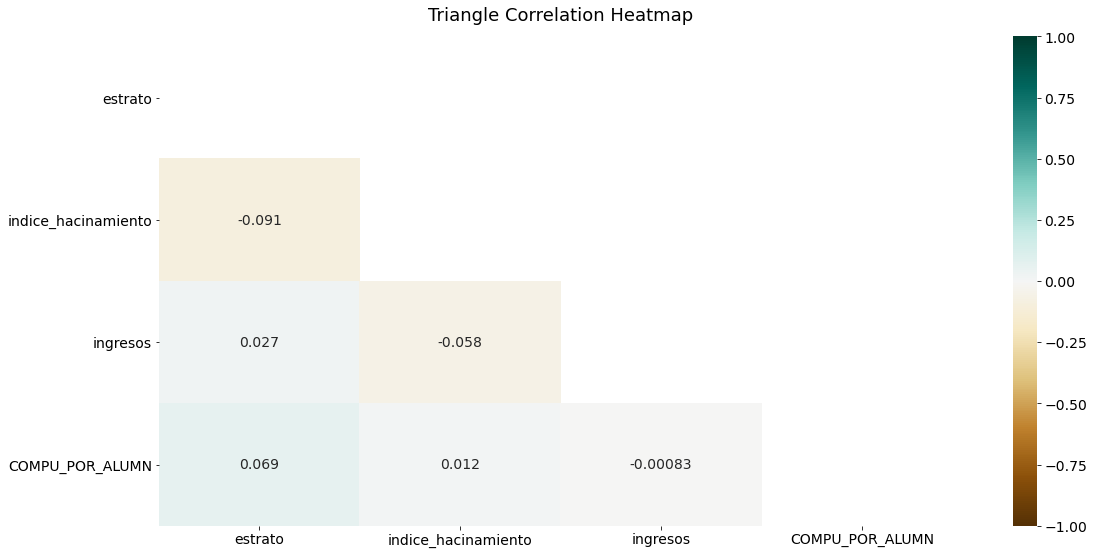

In [45]:
plt.figure(figsize=(18, 9))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[variables].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df[variables])

,variables,VIF
0,estrato,4.691012
1,indice_hacinamiento,3.958141
2,ingresos,1.039762
3,COMPU_POR_ALUMN,3.000103


In [47]:
aux_multico = []
multi_df = calc_vif(df[variables])
for i in range(len(multi_df)):
    name = multi_df['variables'][i]
    value= multi_df['VIF'][i]
    if value >= 5: # The statndard rule to discard a variable is: VIF >5
        aux_multico.append(name)
variables = list(set(variables) - set(aux_multico))

In [48]:
variables

['ingresos', 'estrato', 'COMPU_POR_ALUMN', 'indice_hacinamiento']

## Number V: Independence of Observations for categorical Data (since continuous ones were treated already)
In this case the more appropiate thing to do is run a Chi-Squared test between all the categorical predictores and see which pairs are plausible.

In [49]:
def puntaje(x , categorias):
    pun= 0
    for i in categorias:
        crosstab = pd.crosstab(x, df[i])
        chi2, p, dof, ex = stats.chi2_contingency(crosstab)
        if p > 0.05:
            pun += 1
    return pun

In [50]:
independent = pd.DataFrame(columns = ['Category', 'counts'])
cats = categorias
counts = []
for j in categorias:
    counts.append(puntaje(df[j], categorias));
   
independent['Category'] = categorias
independent['counts'] = counts
independent = independent.sort_values(by = 'counts', ascending = False)
independent

,Category,counts
0,GENERO,10
2,PROVIENE_OTR_MUN,9
3,TIPO_DISCAPACIDAD,7
15,ES_BILINGUE,6
1,POB_VICT_CONF,5
10,vivienda,5
14,tiene_auto,5
6,SIT_ACAD_ANIO_ANT,3
7,CON_ALUM_ANIO_ANT,3
13,computador,3


In [51]:
independent['Below'] = independent['Category'].shift(-1)
independent

,Category,counts,Below
0,GENERO,10,PROVIENE_OTR_MUN
2,PROVIENE_OTR_MUN,9,TIPO_DISCAPACIDAD
3,TIPO_DISCAPACIDAD,7,ES_BILINGUE
15,ES_BILINGUE,6,POB_VICT_CONF
1,POB_VICT_CONF,5,vivienda
10,vivienda,5,tiene_auto
14,tiene_auto,5,SIT_ACAD_ANIO_ANT
6,SIT_ACAD_ANIO_ANT,3,CON_ALUM_ANIO_ANT
7,CON_ALUM_ANIO_ANT,3,computador
13,computador,3,CODIGO_GRADO


In [52]:
independent = independent.reset_index()

In [53]:
vals = []
for i in range(len(independent['Category'])-1):
    crosstab = pd.crosstab(df[independent['Category'][i]], df[independent['Below'][i]])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    vals.append(p)    

In [54]:
vals.append(1)

In [55]:
independent['p_values'] = vals

In [56]:
independent

,index,Category,counts,Below,p_values
0,0,GENERO,10,PROVIENE_OTR_MUN,8.810315e-01
1,2,PROVIENE_OTR_MUN,9,TIPO_DISCAPACIDAD,8.707969e-01
2,3,TIPO_DISCAPACIDAD,7,ES_BILINGUE,8.282473e-02
3,15,ES_BILINGUE,6,POB_VICT_CONF,9.677395e-01
4,1,POB_VICT_CONF,5,vivienda,2.211130e-01
5,10,vivienda,5,tiene_auto,7.626982e-157
6,14,tiene_auto,5,SIT_ACAD_ANIO_ANT,1.334359e-01
7,6,SIT_ACAD_ANIO_ANT,3,CON_ALUM_ANIO_ANT,0.000000e+00
8,7,CON_ALUM_ANIO_ANT,3,computador,1.410764e-04
9,13,computador,3,CODIGO_GRADO,1.807695e-19


In [57]:
cat_iid = []
for i in range(independent.shape[0]):
    cat_iid.append(independent['Category'][i])
    if independent['p_values'][i] <= 0.05:
        print(i)
        break

5


In [58]:
cat_iid

['GENERO',
 'PROVIENE_OTR_MUN',
 'TIPO_DISCAPACIDAD',
 'ES_BILINGUE',
 'POB_VICT_CONF',
 'vivienda']

In [59]:
categorias = cat_iid

------------------

### Run Models

In [60]:
def formula_maker(dependiente, variables, categorias):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
    for categoria in categorias:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'C({categoria})'
    return formula  

In [61]:
formula=formula_maker('REPITENTE', variables, categorias)
model= smf.logit(formula= formula, data= df).fit() # Add if method='bfgs' if singular Matrix appears
model.summary()

         Current function value: 0.001781
         Iterations: 35


C:\Users\diego\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               172893
Model:                          Logit   Df Residuals:                   172867
Method:                           MLE   Df Model:                           25
Date:                Sun, 03 Jul 2022   Pseudo R-squ.:                  0.4277
Time:                        11:44:55   Log-Likelihood:                -307.85
converged:                      False   LL-Null:                       -537.95
Covariance Type:            nonrobust   LLR p-value:                 1.300e-81
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -9.8987      0.820    -12.067      0.000     -11.507      -8.291
C(GENERO)[T.1]                2.7609      0.601      4.598      0.000       1.584       3.938
C(PROVIENE_OTR_MUN)[T.1]      3.0190      0.450      6.703      0.000       2.136       3.902
C(TIPO_DISCAPACIDAD)[T.1]     3.9454      0.293     13.467      0.000       3.371       4.520
C(ES_BILINGUE)[T.1]         -13.0260    742.809     -0.018      0.986   -1468.905    1442.853
C(POB_VICT_CONF)[T.2]       -10.6729   1223.860     -0.009      0.993   -2409.394    2388.048
C(POB_VICT_CONF)[T.3]         1.3375      1.139      1.174      0.240      -0.896       3.571
C(POB_VICT_CONF)[T.4]         2.1613      1.237      1.748      0.081      -0.262       4.585
C(POB_VICT_CONF)[T.6]        -9.3963    335.150     -0.028      0.978    -666.277     647.485
C(POB_VICT_CONF)[T.7]        -2.1089    256.428     -0.008      0.993    -504.699     500.482
C(POB_VICT_CONF)[T.9]       -15.7650   9369.668     -0.002      0.999   -1.84e+04    1.83e+04
C(POB_VICT_CONF)[T.10]        0.3306      1.131      0.292      0.770      -1.886       2.547
C(POB_VICT_CONF)[T.12]      -16.5917   7.57e+04     -0.000      1.000   -1.48e+05    1.48e+05
C(POB_VICT_CONF)[T.13]       -5.5129   9378.372     -0.001      1.000   -1.84e+04    1.84e+04
C(POB_VICT_CONF)[T.15]       -7.2203    552.393     -0.013      0.990   -1089.891    1075.451
C(POB_VICT_CONF)[T.17]       -5.2548   1423.835     -0.004      0.997   -2795.920    2785.410
C(POB_VICT_CONF)[T.18]      -10.5086   5124.273     -0.002      0.998   -1.01e+04       1e+04
C(POB_VICT_CONF)[T.20]       -6.1226   1553.352     -0.004      0.997   -3050.636    3038.391
C(POB_VICT_CONF)[T.99]       -2.0415      0.346     -5.905      0.000      -2.719      -1.364
C(vivienda)[T.2]              0.1978      0.291      0.680      0.497      -0.373       0.768
C(vivienda)[T.3]              0.3657      1.373      0.266      0.790      -2.325       3.057
C(vivienda)[T.4]           -150.3271   1.67e+34  -9.01e-33      1.000   -3.27e+34    3.27e+34
ingresos                  -7.052e-06   9.69e-06     -0.727      0.467   -2.61e-05    1.19e-05
estrato                      -1.5316      0.259     -5.905      0.000      -2.040      -1.023
COMPU_POR_ALUMN               2.6796      0.795      3.372      0.001       1.122       4.237
indice_hacinamiento           0.5627      0.046     12.361      0.000       0.473       0.652
=============================================================================================

Possibly complete quasi-separation: A fraction 0.82 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [62]:
formula=formula_maker('REPITENTE', variables, categorias)
model= smf.logit(formula= formula, data= df).fit(method = 'bfgs') # Add if method='bfgs' if singular Matrix appears
model.summary()

C:\Users\diego\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\diego\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\diego\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\diego\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\diego\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\diego\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  re

         Current function value: 0.005492
         Iterations: 24
         Function evaluations: 60
         Gradient evaluations: 37


C:\Users\diego\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               172893
Model:                          Logit   Df Residuals:                   172867
Method:                           MLE   Df Model:                           25
Date:                Sun, 03 Jul 2022   Pseudo R-squ.:                 -0.7652
Time:                        11:45:08   Log-Likelihood:                -949.60
converged:                      False   LL-Null:                       -537.95
Covariance Type:            nonrobust   LLR p-value:                     1.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -3.1751      5.905     -0.538      0.591     -14.750       8.399
C(GENERO)[T.1]               -0.7745      3.334     -0.232      0.816      -7.309       5.760
C(PROVIENE_OTR_MUN)[T.1]      0.0974     13.041      0.007      0.994     -25.462      25.656
C(TIPO_DISCAPACIDAD)[T.1]     0.5477      5.798      0.094      0.925     -10.816      11.912
C(ES_BILINGUE)[T.1]          -0.1327     16.868     -0.008      0.994     -33.193      32.927
C(POB_VICT_CONF)[T.2]        -0.0011     27.063  -4.03e-05      1.000     -53.044      53.041
C(POB_VICT_CONF)[T.3]         0.0125     28.503      0.000      1.000     -55.852      55.877
C(POB_VICT_CONF)[T.4]         0.0151     40.078      0.000      1.000     -78.537      78.567
C(POB_VICT_CONF)[T.6]     -6.038e-05   1020.447  -5.92e-08      1.000   -2000.039    2000.039
C(POB_VICT_CONF)[T.7]     -9.029e-05    152.508  -5.92e-07      1.000    -298.909     298.909
C(POB_VICT_CONF)[T.9]        -0.0034     35.896  -9.54e-05      1.000     -70.359      70.352
C(POB_VICT_CONF)[T.10]        0.0127     11.359      0.001      0.999     -22.251      22.277
C(POB_VICT_CONF)[T.12]    -1.513e-05    306.356  -4.94e-08      1.000    -600.447     600.447
C(POB_VICT_CONF)[T.13]     -3.31e-05   1.63e+04  -2.03e-09      1.000   -3.19e+04    3.19e+04
C(POB_VICT_CONF)[T.15]    -4.552e-06    360.392  -1.26e-08      1.000    -706.355     706.355
C(POB_VICT_CONF)[T.17]       -0.0002   1036.115  -2.19e-07      1.000   -2030.748    2030.748
C(POB_VICT_CONF)[T.18]       -0.0003    686.863  -4.56e-07      1.000   -1346.227    1346.226
C(POB_VICT_CONF)[T.20]       -0.0003     90.001  -3.25e-06      1.000    -176.399     176.399
C(POB_VICT_CONF)[T.99]       -3.2214      3.416     -0.943      0.346      -9.916       3.473
C(vivienda)[T.2]             -0.1433      5.337     -0.027      0.979     -10.603      10.317
C(vivienda)[T.3]              0.0189     26.396      0.001      0.999     -51.716      51.754
C(vivienda)[T.4]             -0.0002    443.758  -4.88e-07      1.000    -869.749     869.749
ingresos                  -3.906e-06   5.25e-05     -0.074      0.941      -0.000    9.91e-05
estrato                      -5.0127      3.485     -1.438      0.150     -11.844       1.819
COMPU_POR_ALUMN              -0.4438     14.160     -0.031      0.975     -28.197      27.310
indice_hacinamiento          -0.5430      1.681     -0.323      0.747      -3.838       2.752
=============================================================================================

Possibly complete quasi-separation: A fraction 1.00 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [63]:
all_vars = variables + categorias

In [64]:
X = df[all_vars]

In [65]:
X

,ingresos,estrato,COMPU_POR_ALUMN,indice_hacinamiento,GENERO,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,ES_BILINGUE,POB_VICT_CONF,vivienda
321,0,3,0.524904,1.000000,0,0,0,0,99,1
322,0,3,0.524904,1.333008,0,0,0,0,99,1
324,0,3,0.524904,2.000000,1,0,0,0,99,1
326,0,3,0.524904,5.000000,0,0,0,0,1,2
327,0,3,0.524904,1.333008,1,0,0,0,99,1
...,...,...,...,...,...,...,...,...,...,...
455474,0,2,0.110204,3.000000,1,0,1,0,99,2
455476,0,2,0.110204,2.000000,0,0,1,0,99,2
455477,0,2,0.110204,4.000000,1,0,1,0,99,2
455478,0,2,0.110204,2.666016,0,0,1,0,99,1


In [70]:
y = df['REPITENTE']
y

321       0
322       0
324       0
326       0
327       0
         ..
455474    0
455476    0
455477    0
455478    0
455482    0
Name: REPITENTE, Length: 172893, dtype: uint8

In [67]:
X = pd.get_dummies(X, columns=categorias, drop_first=True)
X.head(2)

,ingresos,estrato,COMPU_POR_ALUMN,indice_hacinamiento,GENERO_1,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,ES_BILINGUE_1,POB_VICT_CONF_2,POB_VICT_CONF_3,POB_VICT_CONF_4,POB_VICT_CONF_6,POB_VICT_CONF_7,POB_VICT_CONF_9,POB_VICT_CONF_10,POB_VICT_CONF_12,POB_VICT_CONF_13,POB_VICT_CONF_15,POB_VICT_CONF_17,POB_VICT_CONF_18,POB_VICT_CONF_20,POB_VICT_CONF_99,vivienda_2,vivienda_3,vivienda_4
321,0,3,0.524904,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
322,0,3,0.524904,1.333008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [71]:
logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               172893
Model:                            GLM   Df Residuals:                   172868
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.60
Date:                Sun, 03 Jul 2022   Deviance:                       917.19
Time:                        11:46:15   Pearson chi2:                 7.17e+05
No. Iterations:                    28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
ingresos            -2.413e-05   1.04e-05     -2.321      0.020   -4.45e-05   -3.75e-06
estrato                -3.8116      0.221    -17.220      0.000      -4.245      -3.378
COMPU_POR_ALUMN        -6.2766      1.220     -5.146      0.000      -8.667      -3.886
indice_hacinamiento     0.1279      0.050      2.539      0.011       0.029       0.227
GENERO_1                0.2217      0.217      1.023      0.306      -0.203       0.646
PROVIENE_OTR_MUN_1      1.8768      0.483      3.888      0.000       0.931       2.823
TIPO_DISCAPACIDAD_1     3.1851      0.240     13.254      0.000       2.714       3.656
ES_BILINGUE_1         -21.3209   1.67e+04     -0.001      0.999   -3.28e+04    3.27e+04
POB_VICT_CONF_2       -25.2899   2.09e+05     -0.000      1.000    -4.1e+05     4.1e+05
POB_VICT_CONF_3         0.4455      1.046      0.426      0.670      -1.605       2.496
POB_VICT_CONF_4         0.4247      1.233      0.344      0.731      -1.993       2.842
POB_VICT_CONF_6       -19.7661   1.04e+06   -1.9e-05      1.000   -2.04e+06    2.04e+06
POB_VICT_CONF_7       -24.7459    1.6e+06  -1.55e-05      1.000   -3.13e+06    3.13e+06
POB_VICT_CONF_9       -24.4043   2.27e+05     -0.000      1.000   -4.45e+05    4.45e+05
POB_VICT_CONF_10       -1.1722      1.214     -0.965      0.334      -3.552       1.207
POB_VICT_CONF_12      -25.9409    1.6e+06  -1.63e-05      1.000   -3.13e+06    3.13e+06
POB_VICT_CONF_13      -17.0077    1.6e+06  -1.07e-05      1.000   -3.13e+06    3.13e+06
POB_VICT_CONF_15      -25.5664    1.6e+06   -1.6e-05      1.000   -3.13e+06    3.13e+06
POB_VICT_CONF_17      -20.2242   6.45e+05  -3.14e-05      1.000   -1.26e+06    1.26e+06
POB_VICT_CONF_18      -21.3112   5.21e+05  -4.09e-05      1.000   -1.02e+06    1.02e+06
POB_VICT_CONF_20      -25.2704   1.12e+06  -2.26e-05      1.000   -2.19e+06    2.19e+06
POB_VICT_CONF_99       -3.4793      0.216    -16.142      0.000      -3.902      -3.057
vivienda_2             -0.0811      0.269     -0.302      0.763      -0.608       0.445
vivienda_3             -1.0402      1.179     -0.882      0.378      -3.351       1.271
vivienda_4            -21.0393   4.58e+05  -4.59e-05      1.000   -8.98e+05    8.98e+05
=======================================================================================
"""

In [72]:
variables

['ingresos', 'estrato', 'COMPU_POR_ALUMN', 'indice_hacinamiento']

In [73]:
categorias

['GENERO',
 'PROVIENE_OTR_MUN',
 'TIPO_DISCAPACIDAD',
 'ES_BILINGUE',
 'POB_VICT_CONF',
 'vivienda']

### Conclusions